In [31]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import sklearn as sk

In [322]:
np.random.seed(42)
X = np.random.randn(10, 3)  # 10 observaciones, 3 variables
X_centered = X - X.mean(axis=0)

# 2️⃣ Aplicamos PCA
pca = PCA(svd_solver="covariance_eigh")
pca.fit(X_centered)

# Autovalores del PCA (varianzas explicadas)
lambda_pca = pca.explained_variance_

# 3️⃣ Aplicamos SVD
U, sigma, VT = np.linalg.svd(X_centered, full_matrices=False)

# Autovalores equivalentes desde SVD
n = X_centered.shape[0]
lambda_svd = (sigma ** 2) / (n - 1)

# 4️⃣ Mostramos resultados
print("Autovalores de PCA (varianza explicada):")
print(lambda_pca)

print("\nAutovalores equivalentes desde SVD:")
print(lambda_svd)

print("\n¿Coinciden?:", np.allclose(lambda_pca, lambda_svd))

Autovalores de PCA (varianza explicada):
[1.139166   0.78744362 0.34832021]

Autovalores equivalentes desde SVD:
[1.139166   0.78744362 0.34832021]

¿Coinciden?: True


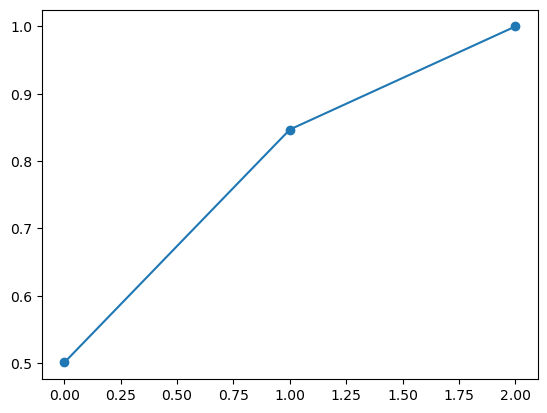

In [278]:
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker="o");

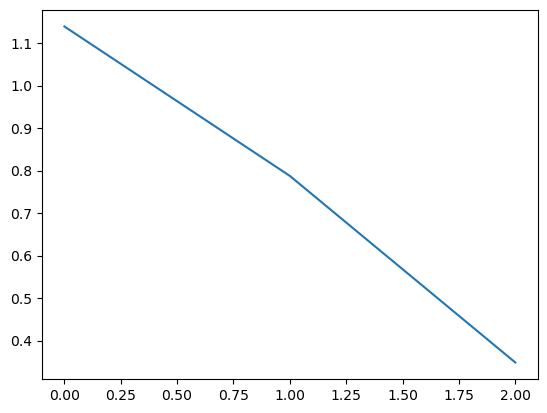

In [275]:
plt.plot(pca.explained_variance_);

## Ejemplo libro

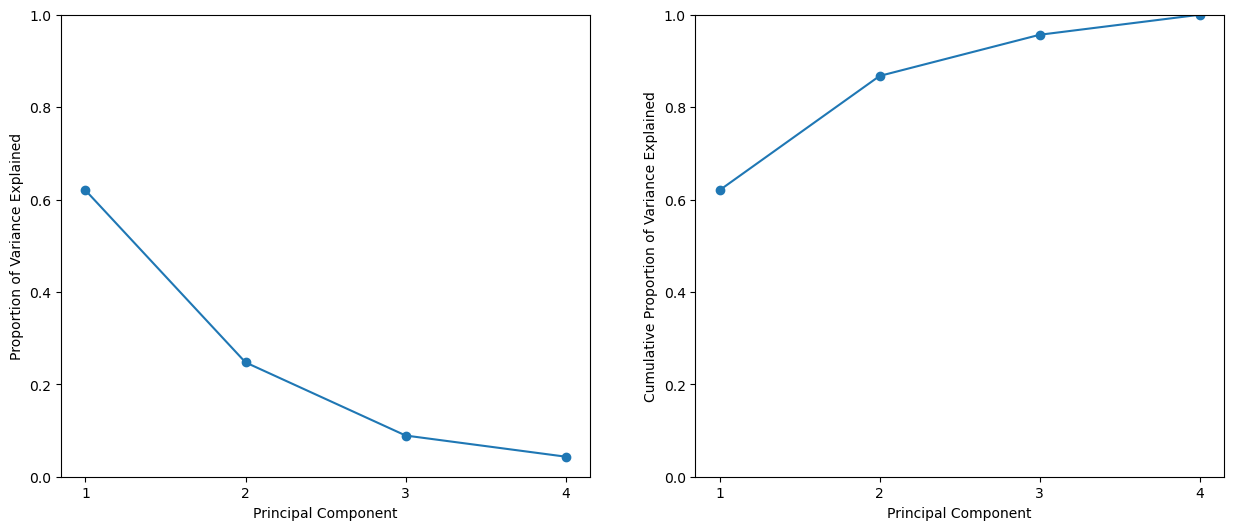

In [68]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
ticks = np.arange(pca.n_components_)+1
ax = axes[0]
ax.plot(ticks,
        pca.explained_variance_ratio_,
        marker='o')

ax.set_xlabel('Principal Component');
ax.set_ylabel('Proportion of Variance Explained')
ax.set_ylim([0,1])
ax.set_xticks(ticks)

ax = axes[1]
ax.plot(ticks,
        pca.explained_variance_ratio_.cumsum(),
        marker='o')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Cumulative Proportion of Variance Explained')
ax.set_ylim([0, 1])
ax.set_xticks(ticks);

## Ejemplo simple

In [547]:
np.random.seed(2025)
theta = np.pi / 3
n = 400
rotar = np.array([[np.cos(theta), -np.sin(theta)],
                  [np.sin(theta), np.cos(theta)]])
x = np.concat([np.random.randn(n//2, 2) @ np.diag([2, .5]) @ rotar,
               np.random.randn(n//2, 2) @ np.diag([2, .5]) @ rotar + np.array([5, 5])])

In [548]:
x.shape

(400, 2)

In [549]:
x.std(axis=0)

array([2.73973699, 3.02322685])

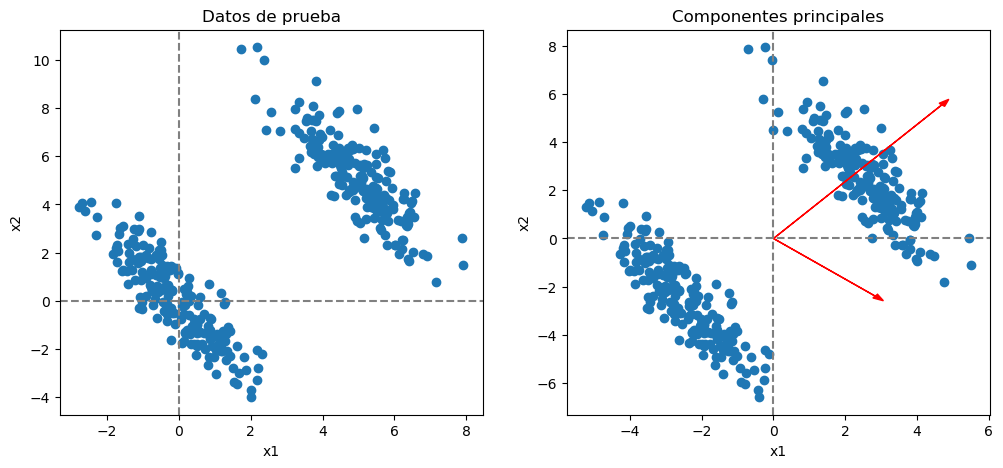

In [550]:
_, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].scatter(x[:,0], x[:,1])
ax[0].axhline(0, color="gray", linestyle="--")
ax[0].axvline(0, color="gray", linestyle="--")
ax[0].set_xlabel("x1")
ax[0].set_ylabel("x2");
ax[0].set_title("Datos de prueba");


b = x - x.mean(axis=0)
u, s, vt = np.linalg.svd(b, full_matrices=False)
scores = u @ np.diag(s)

ax[1].scatter(b[:,0], b[:,1]);

loadings = vt.T
for k in range(loadings.shape[0]):
    ax[1].arrow(0, 0,
                loadings[k, 0] * s[k] * 0.1, loadings[k, 1] * s[k] * 0.1,
                head_width=0.2,
                color="red")
ax[1].axhline(0, color="gray", linestyle="--")
ax[1].axvline(0, color="gray", linestyle="--")
ax[1].set_xlabel("x1")
ax[1].set_ylabel("x2");
ax[1].set_title("Componentes principales");

In [551]:
# Varianza de cada auto vector
s

array([72.68624282, 37.08279749])

In [552]:
# Auto vectores
vt

array([[ 0.64528537,  0.76394161],
       [ 0.76394161, -0.64528537]])

In [553]:
(vt.T @ vt).round(4)

array([[ 1., -0.],
       [-0.,  1.]])

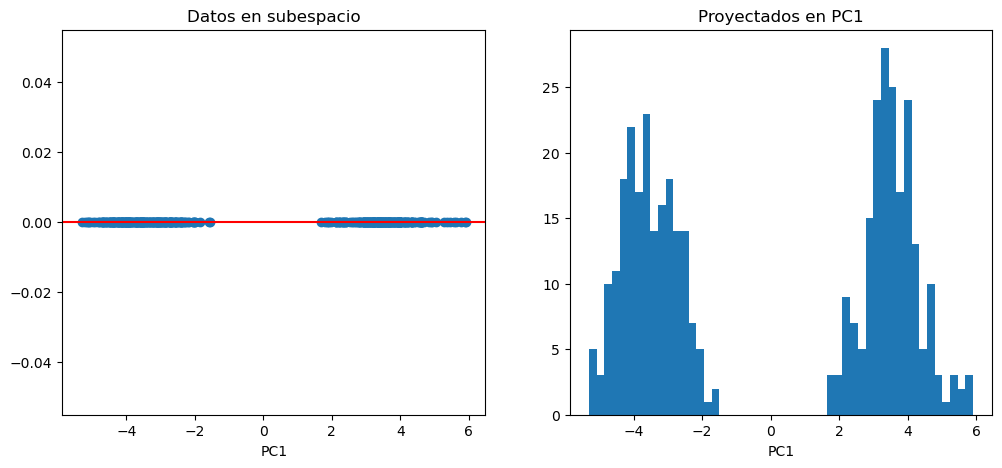

In [554]:
scores = u @ np.diag(s)
_, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].scatter(scores[:,0], np.zeros(scores.shape[0]));
ax[0].axhline(0, color="red")

ax[0].set_xlabel("PC1")
ax[0].set_title("Datos en subespacio");

ax[1].hist(scores[:,0], bins=50);
ax[1].set_xlabel("PC1")
ax[1].set_title("Proyectados en PC1");


## Ejemplo real

In [557]:
df = pd.read_csv("data/USArrests.csv").drop(columns=["rownames"])
df.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [558]:
df_scaled = (df - df.mean()) / df.std()
df_scaled.mean().round(4)

Murder     -0.0
Assault     0.0
UrbanPop   -0.0
Rape        0.0
dtype: float64

In [559]:
u, s, vt = np.linalg.svd(df_scaled, full_matrices=False)

In [560]:
(vt.T @ vt).round(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [561]:
s.round(2)

array([11.02,  6.96,  4.18,  2.92])

In [562]:
scores = u @ np.diag(s)

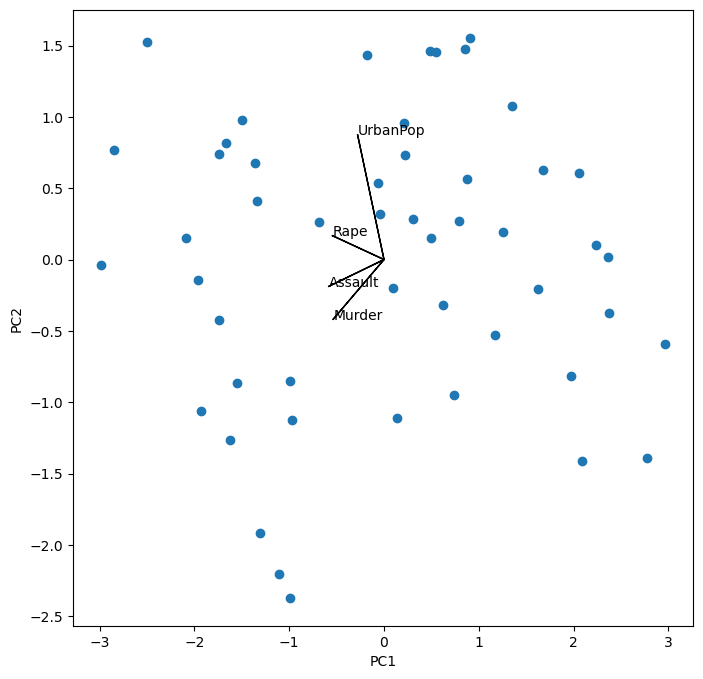

In [563]:
_, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(scores[:,0], scores[:,1])
ax.set_xlabel('PC%d' % (1))
ax.set_ylabel('PC%d' % (2))

loadings = vt.T
for k in range(loadings.shape[1]):
    ax.arrow(0, 0,
             loadings[k, 0], loadings[k, 1])
    ax.text(loadings[k,0],
            loadings[k,1],
            df.columns[k])

In [564]:
varianza = ((s**2) / (n - 1))
varianza_ratio = varianza / varianza.sum()

In [565]:
varianza_ratio

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

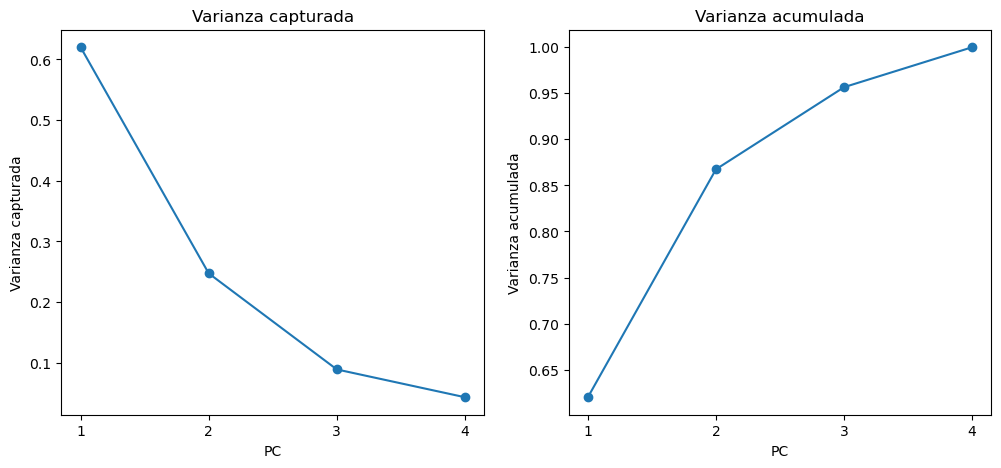

In [575]:
_, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(np.arange(len(varianza_ratio))+1, varianza_ratio);
ax[0].scatter(np.arange(len(varianza_ratio))+1, varianza_ratio);
ax[0].set_xticks(np.arange(4)+1)
ax[0].set_xlabel("PC")
ax[0].set_ylabel("Varianza capturada")
ax[0].set_title("Varianza capturada")

ax[1].plot(np.arange(len(varianza_ratio))+1, np.cumsum(varianza_ratio));
ax[1].scatter(np.arange(len(varianza_ratio))+1, np.cumsum(varianza_ratio));
ax[1].set_xticks(np.arange(4)+1);
ax[1].set_xlabel("PC")
ax[1].set_ylabel("Varianza acumulada")
ax[1].set_title("Varianza acumulada");